In [297]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [298]:
df=pd.read_csv('train_jqd04QH.csv')
df_test=pd.read_csv('test_KaymcHn.csv')
df_sub=pd.read_csv('sample_submission_sxfcbdx.csv')

In [299]:
df_copy=df.copy()

## Analyzing the shape and nulls present in data

In [300]:
df.shape

(18359, 14)

In [301]:
df_test.shape

(15021, 13)

In [302]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [303]:
df_test.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    3388
relevent_experience          0
enrolled_university        279
education_level            395
major_discipline          2393
experience                  44
company_size              4051
company_type              4330
last_new_job               304
training_hours               0
dtype: int64

### city

In [304]:
df['city'].nunique()

123

In [305]:
x=pd.crosstab(df['city'],df['target'])
from scipy.stats import chi2_contingency
chi2_contingency(x)[1]

3.855216727610397e-64

### City is an import feature with respect to target.

### city_development_index

In [306]:
df['city_development_index'].nunique()

93

In [307]:
x=pd.crosstab(df['city_development_index'],df['target'])
from scipy.stats import chi2_contingency
chi2_contingency(x)[1]

5.347324835039271e-69

In [308]:
analysis=df.groupby(['city_development_index'])['city'].count().reset_index()

In [309]:
analysis=analysis.set_index('city_development_index')
analysis=analysis.sort_index(ascending=False)

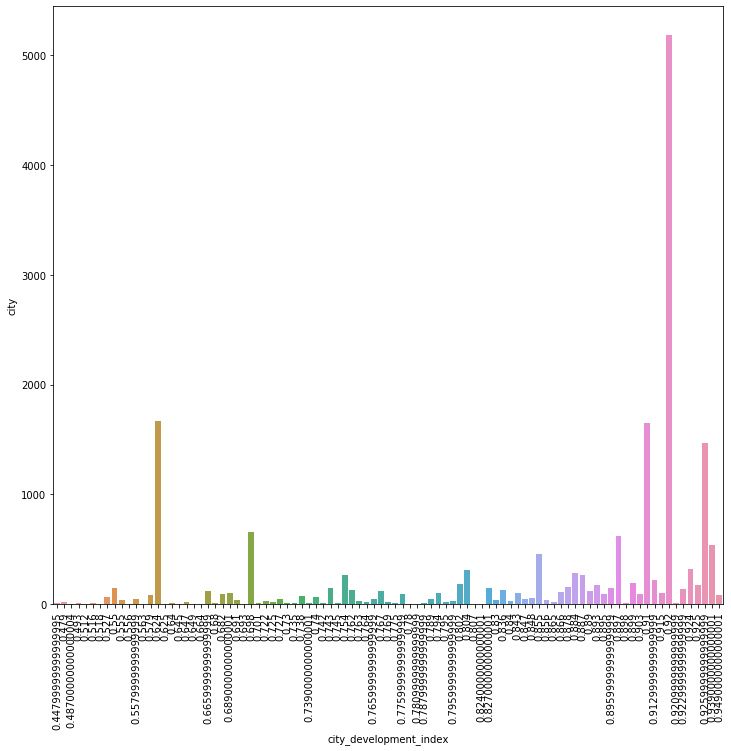

In [310]:
plt.figure(figsize=(12,11))
sns.barplot(analysis.index,analysis.city)
plt.xticks(rotation=90)
plt.show()

### gender

In [311]:
df['gender'].value_counts()

Male      12884
Female     1188
Other       189
Name: gender, dtype: int64

In [312]:
x=pd.crosstab(df['gender'],df['target'])
from scipy.stats import chi2_contingency
chi2_contingency(x)[1]

0.009638527670809707

In [313]:
df['gender'].isnull().sum()/df.shape[0]*100

22.321477204640775

### relevent_experience

In [314]:
df['relevent_experience'].value_counts()

Has relevent experience    13596
No relevent experience      4763
Name: relevent_experience, dtype: int64

In [315]:
x=pd.crosstab(df['relevent_experience'],df['target'])
from scipy.stats import chi2_contingency
chi2_contingency(x)[1]

1.3267956813314173e-23

In [316]:
pd.crosstab(df['relevent_experience'],df['target'])/df.shape[0]*100

target,0,1
relevent_experience,,
Has relevent experience,65.373931,8.68239
No relevent experience,21.417289,4.52639


### enrolled_university

In [317]:
df['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', 'Part time course', nan],
      dtype=object)

In [318]:
df['enrolled_university'].value_counts()

no_enrollment       13659
Full time course     3187
Part time course     1171
Name: enrolled_university, dtype: int64

In [319]:
df['enrolled_university'].isnull().sum()/df.shape[0]*100

1.8628465602701674

In [320]:
x=pd.crosstab(df['enrolled_university'],df['target'])
from scipy.stats import chi2_contingency
chi2_contingency(x)[1]

1.7789332654895442e-28

### education_level

In [321]:
df['education_level'].unique()

array(['Graduate', 'Masters', 'High School', 'Phd', nan, 'Primary School'],
      dtype=object)

In [322]:
df['education_level'].value_counts()

Graduate          10769
Masters            4319
High School        2032
Phd                 459
Primary School      323
Name: education_level, dtype: int64

In [323]:
df['education_level'].isnull().sum()/df.shape[0]*100

2.489242333460428

In [324]:
x=pd.crosstab(df['education_level'],df['target'])
from scipy.stats import chi2_contingency
chi2_contingency(x)[1]

7.262842220434136e-06

### major_discipline

In [325]:
df['major_discipline'].unique()

array(['STEM', 'Other', 'No Major', nan, 'Business Degree', 'Arts',
       'Humanities'], dtype=object)

In [326]:
df['major_discipline'].isnull().sum()/df.shape[0]*100

15.458358298382265

In [327]:
df['major_discipline'].value_counts()

STEM               13738
Humanities           688
Other                343
Business Degree      307
Arts                 239
No Major             206
Name: major_discipline, dtype: int64

In [328]:
x=pd.crosstab(df['major_discipline'],df['target'])
from scipy.stats import chi2_contingency
chi2_contingency(x)[1]

0.21553926861001507

### ROLE OF FEATURE ENGINEERING WITH RESPECT TO MAJOR_DISCIPLINE MIGHT BE CONSIDERED

### experience

In [329]:
df['experience'].unique()

array(['3', '14', '6', '8', '>20', '4', '9', '15', '10', '1', '5', '16',
       '11', '12', '7', '2', '13', '<1', '19', '18', '17', nan, '20'],
      dtype=object)

In [330]:
df['experience'].isnull().sum()/df.shape[0]*100

0.3213682662454382

In [331]:
x=pd.crosstab(df['experience'],df['target'])
from scipy.stats import chi2_contingency
chi2_contingency(x)[1]

1.9658203231124298e-30

### company_size

In [332]:
df['company_size'].unique()

array(['100-500', '<10', '50-99', nan, '5000-9999', '10000+', '1000-4999',
       '500-999', '10/49'], dtype=object)

In [333]:
df['company_size'].isnull().sum()/df.shape[0]*100

26.03082956588049

In [334]:
x=pd.crosstab(df['company_size'],df['target'])
from scipy.stats import chi2_contingency
chi2_contingency(x)[1]

0.019162917486513036

### company_type

In [335]:
df['company_type'].unique()

array(['Pvt Ltd', 'Funded Startup', 'Public Sector', nan,
       'Early Stage Startup', 'NGO', 'Other'], dtype=object)

In [336]:
df['company_type'].isnull().sum()/df.shape[0]*100

27.447028705267172

In [337]:
x=pd.crosstab(df['company_type'],df['target'])
from scipy.stats import chi2_contingency
chi2_contingency(x)[1]

6.953189749635574e-05

### last_new_job

In [338]:
df['last_new_job'].unique()

array(['1', '2', '3', '>4', 'never', '4', nan], dtype=object)

In [339]:
df['last_new_job'].isnull().sum()/df.shape[0]*100

1.9990195544419629

In [340]:
x=pd.crosstab(df['last_new_job'],df['target'])
from scipy.stats import chi2_contingency
chi2_contingency(x)[1]

0.0009590216415931114

### training_hours

In [341]:
x=pd.crosstab(df['training_hours'],df['target'])
from scipy.stats import chi2_contingency
chi2_contingency(x)[1]

0.6195074007337502

### Seems to be not important with respect to stats test

### target

In [342]:
df['target'].value_counts()

0    15934
1     2425
Name: target, dtype: int64

### Gender_Imputation

In [343]:
pd.set_option('display.max_rows', 500)
x=df.groupby(['city','gender']).count()['relevent_experience'].reset_index().sort_index()
x1=x.groupby(['city']).agg({'relevent_experience':'max'}).reset_index()
x2=pd.merge(left=x,right=x1,on='city')
x2=x2[x2['relevent_experience_x']==x2['relevent_experience_y']]
x2=x2.drop(['relevent_experience_x','relevent_experience_y'],axis=1)
x2.columns=['city','gender_To_impute']

In [344]:
df_copy=pd.merge(left=df_copy,right=x2,on='city')

In [345]:
df_copy['gender']=df_copy.apply(lambda x:x['gender_To_impute'] if(pd.isna(x['gender'])) else x['gender'],axis=1)

In [346]:
df_copy=df_copy.drop(['gender_To_impute'],axis=1)

### Imputation for enrolled_university & education_level & experience & last_new_job

In [347]:
df_copy['enrolled_university']=df_copy['enrolled_university'].fillna(df_copy['enrolled_university'])

In [348]:
df_copy['education_level']=df_copy['education_level'].fillna(df_copy['education_level'].mode()[0])

In [349]:
df['experience']=df['experience'].fillna(df['experience'].mode()[0])

In [350]:
df['last_new_job']=df['last_new_job'].fillna(df['last_new_job'].mode()[0])
df_copy['major_discipline']=df_copy['major_discipline'].fillna(df_copy['major_discipline'].mode()[0])

In [351]:
df_copy['enrolled_university']=df_copy['enrolled_university'].fillna(df_copy['enrolled_university'].mode()[0])
df_copy['company_size']=df_copy['company_size'].fillna(df_copy['company_size'].mode()[0])
df_copy['experience']=df_copy['experience'].fillna(df_copy['experience'].mode()[0])
df_copy['company_type']=df_copy['company_type'].fillna(df_copy['company_type'].mode()[0])
df_copy['last_new_job']=df_copy['last_new_job'].fillna(df_copy['last_new_job'].mode()[0])

In [352]:
def function_impute(data,test):
    data['enrolled_university']=data['enrolled_university'].fillna(data['enrolled_university'].mode()[0])
    data['education_level']=data['education_level'].fillna(data['education_level'].mode()[0])
    data['experience']=data['experience'].fillna(data['experience'].mode()[0])
    data['last_new_job']=data['last_new_job'].fillna(data['last_new_job'].mode()[0])
    data['major_discipline']=data['major_discipline'].fillna(data['major_discipline'].mode()[0])
    data['enrolled_university']=data['enrolled_university'].fillna(data['enrolled_university'].mode()[0])
    data['company_size']=data['company_size'].fillna(data['company_size'].mode()[0])
    data['experience']=data['experience'].fillna(data['experience'].mode()[0])
    data['company_type']=data['company_type'].fillna(data['company_type'].mode()[0])
    data['last_new_job']=data['last_new_job'].fillna(data['last_new_job'].mode()[0])
    test['enrolled_university']=data['enrolled_university'].fillna(data['enrolled_university'])
    test['education_level']=data['education_level'].fillna(data['education_level'].mode()[0])
    test['experience']=data['experience'].fillna(data['experience'].mode()[0])
    test['last_new_job']=data['last_new_job'].fillna(data['last_new_job'].mode()[0])
    test['major_discipline']=data['major_discipline'].fillna(data['major_discipline'].mode()[0])
    test['enrolled_university']=data['enrolled_university'].fillna(data['enrolled_university'].mode()[0])
    test['company_size']=data['company_size'].fillna(data['company_size'].mode()[0])
    test['experience']=data['experience'].fillna(data['experience'].mode()[0])
    test['company_type']=data['company_type'].fillna(data['company_type'].mode()[0])
    test['gender']=data['gender'].fillna(data['last_new_job'].mode()[0])

### company_type

In [353]:
pd.crosstab(df_copy['company_type'],df_copy['company_size'])

company_size,10/49,100-500,1000-4999,10000+,50-99,500-999,5000-9999,<10
company_type,,,,,,,,
Early Stage Startup,168,22,0,0,102,2,0,288
Funded Startup,208,226,0,0,405,51,0,149
NGO,33,183,77,41,102,35,31,32
Other,10,21,15,17,25,11,9,11
Public Sector,40,170,180,158,226,93,89,40
Pvt Ltd,1008,2076,1127,1829,7040,710,462,840


In [354]:
y=df_copy[df_copy['company_size'].isnull()]

In [355]:
pd.crosstab(df_copy['city'],df['relevent_experience'],normalize='index').sort_values(by='No relevent experience')

relevent_experience,Has relevent experience,No relevent experience
city,,
city_39,1.000000,0.000000
city_179,1.000000,0.000000
city_31,1.000000,0.000000
city_171,1.000000,0.000000
city_155,1.000000,0.000000
city_8,1.000000,0.000000
city_129,1.000000,0.000000
city_82,1.000000,0.000000
city_81,1.000000,0.000000


In [356]:
pd.crosstab(df['relevent_experience'],df['target'],normalize='index')

target,0,1
relevent_experience,,
Has relevent experience,0.88276,0.11724
No relevent experience,0.82553,0.17447


In [357]:
qi=df[df['target']==1]

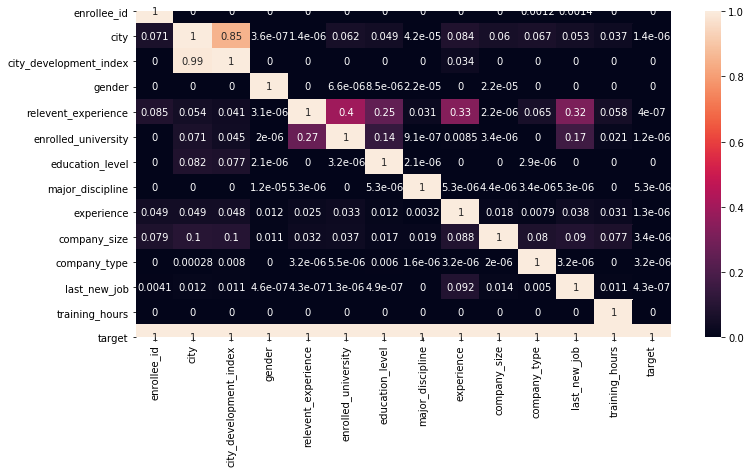

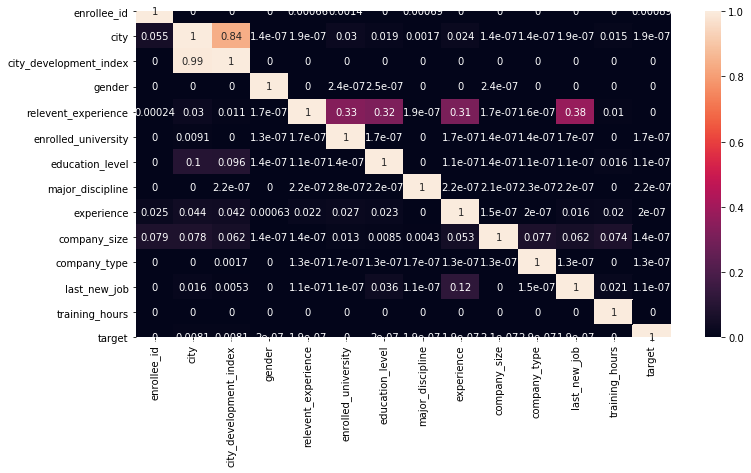

In [358]:
import ppscore

an=ppscore.matrix(qi)

plt.figure(figsize=(12,6))
sns.heatmap(an,annot=True)

an1=ppscore.matrix(df)
plt.figure(figsize=(12,6))
sns.heatmap(an1,annot=True)

In [359]:
df_copy.groupby(['city','company_type']).count()

enrollee_id  city_development_index  gender  \
city     company_type                                                       
city_1   Funded Startup                 1                       1       1   
         Public Sector                  2                       2       2   
         Pvt Ltd                       24                      24      24   
city_10  Early Stage Startup            4                       4       4   
         Funded Startup                 7                       7       7   
         NGO                            3                       3       3   
         Public Sector                  8                       8       8   
         Pvt Ltd                       73                      73      73   
city_100 Early Stage Startup            2                       2       2   
         Funded Startup                 8                       8       8   
         NGO                            2                       2       2   
         Other                          1                       1       1   
         Public Sector                 15                      15      15   
         Pvt Ltd                      243                     243     243   
city_101 Early Stage Startup            5                       5       5   
         NGO                            1                       1       1   
         Pvt Ltd                       38                      38      38   
city_102 Early Stage Startup            6                       6       6   
         Funded Startup                 7                       7       7   
         NGO                            4                       4       4   
         Public Sector                 11                      11      11   
         Pvt Ltd                      285                     285     285   
city_103 Early Stage Startup           94                      94      94   
         Funded Startup               331                     331     331   
         NGO                          213                     213     213   
         Other                         49                      49      49   
         Public Sector                295                     295     295   
         Pvt Ltd                     3376                    3376    3376   
city_104 Early Stage Startup           14                      14      14   
         Funded Startup                16                      16      16   
         NGO                           12                      12      12   
         Other                          2                       2       2   
         Public Sector                 11                      11      11   
         Pvt Ltd                      263                     263     263   
city_105 Early Stage Startup            1                       1       1   
         Funded Startup                 4                       4       4   
         NGO                            3                       3       3   
         Public Sector                  2                       2       2   
         Pvt Ltd                       77                      77      77   
city_106 Pvt Ltd                        8                       8       8   
city_107 NGO                            1                       1       1   
         Pvt Ltd                        3                       3       3   
city_109 Pvt Ltd                        8                       8       8   
city_11  Early Stage Startup            6                       6       6   
         Funded Startup                 5                       5       5   
         NGO                            5                       5       5   
         Other                          1                       1       1   
         Public Sector                  4                       4       4   
         Pvt Ltd                      129                     129     129   
city_111 NGO                            1                       1       1   
         Pvt Ltd          

In [360]:
pd.crosstab(df_copy['company_type'],df_copy['target'],normalize='index')

target,0,1
company_type,,
Early Stage Startup,0.872852,0.127148
Funded Startup,0.907603,0.092397
NGO,0.870787,0.129213
Other,0.840336,0.159664
Public Sector,0.847390,0.152610
Pvt Ltd,0.866486,0.133514


In [361]:
df_copy[(df_copy['company_type']=='Early Stage Startup') & (df_copy['target']==1)]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
30,14353,city_149,0.689,Male,No relevent experience,Full time course,Primary School,STEM,4,<10,Early Stage Startup,1,70,1
586,24271,city_16,0.910,Male,Has relevent experience,no_enrollment,Masters,STEM,2,50-99,Early Stage Startup,1,174,1
1164,16739,city_16,0.910,Male,Has relevent experience,no_enrollment,Masters,STEM,14,50-99,Early Stage Startup,4,19,1
1686,27288,city_16,0.910,Male,Has relevent experience,no_enrollment,High School,STEM,5,<10,Early Stage Startup,1,98,1
1762,16770,city_16,0.910,Female,No relevent experience,no_enrollment,Masters,STEM,3,<10,Early Stage Startup,1,59,1
2426,5734,city_21,0.624,Male,Has relevent experience,Full time course,Graduate,STEM,2,10/49,Early Stage Startup,2,3,1
2515,4634,city_21,0.624,Male,Has relevent experience,Full time course,Graduate,STEM,3,<10,Early Stage Startup,never,38,1
2572,13627,city_21,0.624,Male,No relevent experience,no_enrollment,Masters,STEM,7,50-99,Early Stage Startup,2,18,1
2737,24860,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,1,<10,Early Stage Startup,1,84,1
2788,9065,city_21,0.624,Male,Has relevent experience,Full time course,Graduate,STEM,1,<10,Early Stage Startup,1,188,1


In [362]:
ana=pd.crosstab(df['city'],df_copy['target'],normalize='index').reset_index()

In [363]:
ana[ana[0]==1]

target,city,0,1
12,city_111,1.0,0.0
18,city_12,1.0,0.0
19,city_120,1.0,0.0
20,city_121,1.0,0.0
23,city_127,1.0,0.0
25,city_129,1.0,0.0
27,city_131,1.0,0.0
32,city_139,1.0,0.0
34,city_140,1.0,0.0
40,city_146,1.0,0.0


In [364]:
df_copy[df_copy['target']==1]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,32506,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,50-99,Pvt Ltd,1,68,1
2,12006,city_149,0.689,Male,No relevent experience,Part time course,Graduate,STEM,2,50-99,Pvt Ltd,1,23,1
30,14353,city_149,0.689,Male,No relevent experience,Full time course,Primary School,STEM,4,<10,Early Stage Startup,1,70,1
34,2999,city_149,0.689,Male,No relevent experience,Full time course,High School,STEM,4,50-99,Pvt Ltd,never,121,1
59,24871,city_149,0.689,Male,Has relevent experience,Full time course,Graduate,STEM,2,1000-4999,Pvt Ltd,1,44,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18339,12331,city_79,0.698,Female,No relevent experience,Part time course,Graduate,STEM,2,50-99,Pvt Ltd,1,28,1
18343,16931,city_31,0.807,Male,Has relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,134,1
18347,29815,city_109,0.701,Male,Has relevent experience,no_enrollment,Graduate,STEM,10,50-99,Pvt Ltd,2,65,1
18348,29881,city_109,0.701,Male,No relevent experience,Full time course,Graduate,STEM,3,50-99,Pvt Ltd,1,46,1


In [365]:
city_import=(df_copy.groupby(['city']).count()['enrollee_id']/df_copy.shape[0]).reset_index()
city_import.columns=['city', 'freq_enc_city']
df_copy=pd.merge(left=df_copy,right=city_import,on='city')

In [366]:
from sklearn.preprocessing import LabelEncoder

In [367]:
lb=LabelEncoder()

In [368]:
function_impute(df_copy,df_test)

In [369]:
cols=df_copy.select_dtypes('object').columns
for i in cols:
    lb=LabelEncoder()
    unique_val=list(set(df_copy[i].unique().tolist()+df_test[i].unique().tolist()))
    lb.fit(unique_val)
    df_copy[i]=lb.transform(df_copy[i])
    df_test[i]=lb.transform(df_test[i])

In [1]:
from sklearn.model_selection import cross_val_score
import lightgbm as lgb

In [ ]:
X=df_copy.drop(columns=["target","enrollee_id"])
y=df_copy["target"]

results=cross_val_score(lgb.LGBMClassifier(),X,y,cv=3,scoring="roc_auc",n_jobs=-1)
results

results.mean()